<div align="center">
  <h2>Міністерство освіти і науки України</h2>
  <h2>Національний технічний університет України</h2>
  <h2>«Київський політехнічний інститут ім. Ігоря Сікорського»</h2>
  <h2>Факультет інформатики та обчислювальної техніки</h2>
  <h2>Кафедра обчислювальної техніки</h2>
  <br>
</div>

<div align="right">
    <br>
    <br>
<center>    
<h2>Лабораторна робота №5</h2>
</center>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
Виконав: <br>
Студент ІІ курсу ФІОТ <br>
групи ІО-34 <br>
Рибачок Михайло Володимирович <br>
Номер у списку - 17 <br><br>

<center>
Київ - 2025
</center>

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dev0914sharma/customer-clustering")


In [17]:
# Завантаження потрібних бібліотек для роботи
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
data_customer = pd.read_csv("segmentation data.csv")
data_customer.head(10)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [18]:
# Створюємо модель KMeans з 5 кластерами
kmeans = KMeans(n_clusters=5, init='k-means++')

# Виконуємо кластеризацію на всьому датасеті
y_kmeans = kmeans.fit_predict(data_customer)

# Перетворюємо результат у DataFrame
y_kmeans = pd.DataFrame(y_kmeans)
data_customer['Cluster'] = y_kmeans


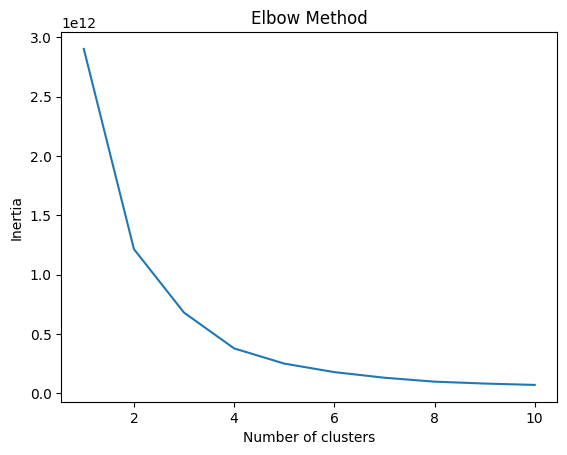

In [11]:
# Формуємо набір ознак для кластеризації (вік + дохід)
X = data_customer[['Age', 'Income']]

# Список для збереження значень інерції (inertia) для кожної кількості кластерів
clalist = []

# Перевіряємо кількість кластерів від 1 до 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)            # Навчаємо модель
    clalist.append(kmeans.inertia_)   # Додаємо значення інерції

# Візуалізуємо "Метод ліктя" для визначення оптимального k
plt.plot(range(1, 11), clalist)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


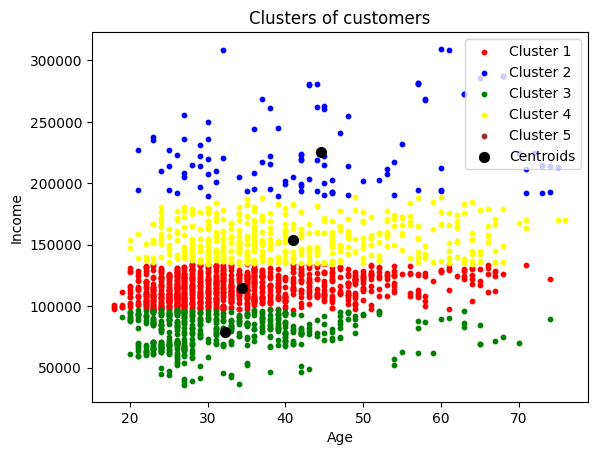

In [13]:

# Використаємо тільки потрібні колонки для кластеризації
X = data_customer[['Age', 'Income']]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Додаємо результат у датафрейм
data_customer['Cluster'] = y_kmeans

# Малюємо кластери
for i, color in enumerate(['red', 'blue', 'green', 'yellow', 'brown']):
    plt.scatter(X.loc[data_customer['Cluster'] == i, 'Age'],
                X.loc[data_customer['Cluster'] == i, 'Income'],
                s=10, c=color, label=f'Cluster {i+1}')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            s=50, c='black', marker='o', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()